In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATASET


In [2]:
audi=pd.read_csv("C:\\Users\\SHREY\\Downloads\\audi.csv")

In [3]:
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [4]:
audi1=audi.copy()

In [5]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
audi["model"].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

In [7]:
audi["transmission"].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [8]:
audi["fuelType"].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [9]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


DATA PREPROCESSING

In [10]:
audi['model']=audi['model'].astype('category')
audi['transmission']=audi['transmission'].astype('category')
audi['fuelType']=audi['fuelType'].astype('category')

In [11]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         10668 non-null  category
 1   year          10668 non-null  int64   
 2   price         10668 non-null  int64   
 3   transmission  10668 non-null  category
 4   mileage       10668 non-null  int64   
 5   fuelType      10668 non-null  category
 6   tax           10668 non-null  int64   
 7   mpg           10668 non-null  float64 
 8   engineSize    10668 non-null  float64 
dtypes: category(3), float64(2), int64(4)
memory usage: 532.9 KB


In [12]:
audi['model']=audi['model'].cat.codes
audi['transmission']=audi['transmission'].cat.codes
audi['fuelType']=audi['fuelType'].cat.codes

In [13]:
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,2,2020,16999,1,4018,2,145,49.6,1.0
10664,2,2020,16999,1,1978,2,150,49.6,1.0
10665,2,2020,17199,1,609,2,150,49.6,1.0
10666,9,2017,19499,0,8646,2,150,47.9,1.4


<Axes: >

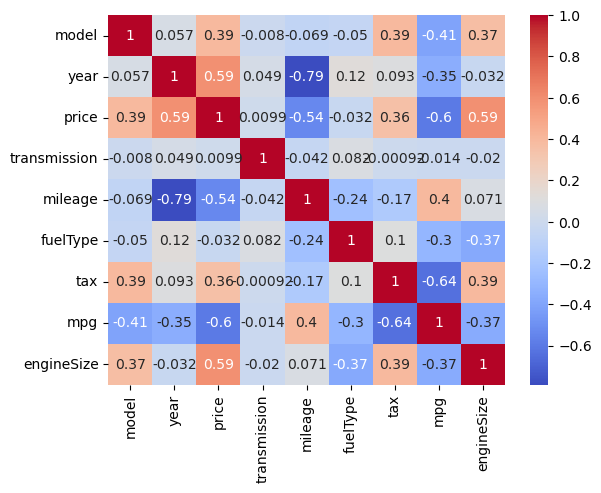

In [14]:
sns.heatmap(audi.corr(),cmap='coolwarm',annot=True)

In [15]:
audi.drop(['transmission'],inplace=True,axis=1)
audi.drop(['fuelType'],inplace=True,axis=1)
audi

,model,year,price,mileage,tax,mpg,engineSize
0,0,2017,12500,15735,150,55.4,1.4
1,5,2016,16500,36203,20,64.2,2.0
2,0,2016,11000,29946,30,55.4,1.4
3,3,2017,16800,25952,145,67.3,2.0
4,2,2019,17300,1998,145,49.6,1.0
...,...,...,...,...,...,...,...
10663,2,2020,16999,4018,145,49.6,1.0
10664,2,2020,16999,1978,150,49.6,1.0
10665,2,2020,17199,609,150,49.6,1.0
10666,9,2017,19499,8646,150,47.9,1.4


In [16]:
x=audi.iloc[:,[0,1,3,4,5,6]].values
x

array([[0.0000e+00, 2.0170e+03, 1.5735e+04, 1.5000e+02, 5.5400e+01,
        1.4000e+00],
       [5.0000e+00, 2.0160e+03, 3.6203e+04, 2.0000e+01, 6.4200e+01,
        2.0000e+00],
       [0.0000e+00, 2.0160e+03, 2.9946e+04, 3.0000e+01, 5.5400e+01,
        1.4000e+00],
       ...,
       [2.0000e+00, 2.0200e+03, 6.0900e+02, 1.5000e+02, 4.9600e+01,
        1.0000e+00],
       [9.0000e+00, 2.0170e+03, 8.6460e+03, 1.5000e+02, 4.7900e+01,
        1.4000e+00],
       [9.0000e+00, 2.0160e+03, 1.1855e+04, 1.5000e+02, 4.7900e+01,
        1.4000e+00]])

In [17]:
y=audi.iloc[:,[2]].values
y

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc

array([[-1.12354352, -0.04644979, -0.3868356 ,  0.35714729,  0.35755001,
        -0.88021837],
       [-0.16083109, -0.50783377,  0.48398914, -1.57832278,  1.03713001,
         0.11492465],
       [-1.12354352, -0.50783377,  0.21778089, -1.42944047,  0.35755001,
        -0.88021837],
       ...,
       [-0.73845855,  1.33770214, -1.03038137,  0.35714729, -0.09035499,
        -1.54364705],
       [ 0.60933885, -0.04644979, -0.68844184,  0.35714729, -0.22163749,
        -0.88021837],
       [ 0.60933885, -0.50783377, -0.55191279,  0.35714729, -0.22163749,
        -0.88021837]])

SPLITTING THE DATASET

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8534, 6)
(2134, 6)
(8534, 1)
(2134, 1)


In [20]:
print(x.shape)
print(y.shape)

(10668, 6)
(10668, 1)


MACHINE LEARNING

In [21]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [22]:
lr_train=lr.predict(x_train)
lr_train

array([[16840.67573597],
       [32869.11283437],
       [ 9413.43914281],
       ...,
       [23584.35753   ],
       [25898.65283452],
       [44418.94439832]])

In [23]:
y_train

array([[14490],
       [28490],
       [11400],
       ...,
       [23252],
       [16995],
       [45890]], dtype=int64)

In [24]:
print(r2_score(y_train,lr_train))

0.7853860472505034


In [25]:
lr_test=lr.predict(x_test)
lr_test

array([[14347.16368653],
       [30298.36598235],
       [30868.84335717],
       ...,
       [43242.73340592],
       [31164.21818316],
       [ 7809.91792436]])

In [26]:
y_test

array([[14998],
       [21950],
       [28990],
       ...,
       [45995],
       [30500],
       [ 8400]], dtype=int64)

In [27]:
print(r2_score(y_test,lr_test))

0.7865183583919167


In [28]:
# K-NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5,p=2)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [29]:
knn_train=knn.predict(x_train)
knn_train

array([[12519. ],
       [29789. ],
       [11529.4],
       ...,
       [21745.8],
       [17638.8],
       [44974. ]])

In [30]:
y_train

array([[14490],
       [28490],
       [11400],
       ...,
       [23252],
       [16995],
       [45890]], dtype=int64)

In [31]:
print(r2_score(y_train,knn_train))

0.9664804589270048


In [32]:
knn_test=knn.predict(x_test)
knn_test

array([[15395.4],
       [24027. ],
       [27583. ],
       ...,
       [47083.4],
       [31156. ],
       [ 9885.2]])

In [33]:
y_test

array([[14998],
       [21950],
       [28990],
       ...,
       [45995],
       [30500],
       [ 8400]], dtype=int64)

In [34]:
print(r2_score(y_test,knn_test))

0.9550870617426728


In [35]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
dt_train=dt.predict(x_train)
dt_train

array([14490., 28490., 11400., ..., 23252., 16995., 45890.])

In [37]:
y_train

array([[14490],
       [28490],
       [11400],
       ...,
       [23252],
       [16995],
       [45890]], dtype=int64)

In [38]:
print(r2_score(y_train,dt_train))

0.9984028278216762


In [39]:
dt_test=dt.predict(x_test)
dt_test

array([13990., 21700., 26990., ..., 46500., 31990.,  7956.])

In [40]:
y_test

array([[14998],
       [21950],
       [28990],
       ...,
       [45995],
       [30500],
       [ 8400]], dtype=int64)

In [41]:
print(r2_score(y_test,dt_test))

0.9146858004710576


In [42]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [43]:
rf_train=rf.predict(x_train)
rf_train

array([14630.92      , 28905.91666667, 11458.49      , ...,
       22980.24      , 17441.72      , 44886.08333333])

In [44]:
y_train


array([[14490],
       [28490],
       [11400],
       ...,
       [23252],
       [16995],
       [45890]], dtype=int64)

In [45]:
print(r2_score(y_train,rf_train))

0.9928762717389304


In [46]:
rf_test=rf.predict(x_test)
rf_test

array([14311.25, 22942.94, 27196.55, ..., 46291.84, 31293.45,  9841.6 ])

In [47]:
y_test

array([[14998],
       [21950],
       [28990],
       ...,
       [45995],
       [30500],
       [ 8400]], dtype=int64)

In [48]:
print(r2_score(y_test,rf_test))

0.9560816367893459


In [49]:
# SUPPORT VECTOR MACHINE
from sklearn.svm import SVR
svm=SVR(kernel='rbf')
svm.fit(x_train,y_train)

SVR()

In [50]:
svm_train=svm.predict(x_train)
svm_train

array([19213.29438198, 21739.66839609, 19305.18831971, ...,
       20491.53337265, 20115.24478459, 21441.55195388])

In [51]:
y_train

array([[14490],
       [28490],
       [11400],
       ...,
       [23252],
       [16995],
       [45890]], dtype=int64)

In [52]:
print(r2_score(y_train,svm_train))

0.05217741926378816


In [53]:
svm_test=svm.predict(x_test)
svm_test

array([19200.70720919, 21550.20575833, 21647.6139932 , ...,
       21311.81977725, 21507.00594819, 18817.00654207])

In [54]:
y_test

array([[14998],
       [21950],
       [28990],
       ...,
       [45995],
       [30500],
       [ 8400]], dtype=int64)

In [55]:
print(r2_score(y_test,svm_test))

0.047945392084350336


SELECTING RANDOM FOREST TO PREDICT THE PRICE AS IT PERFORMED THE BEST

In [56]:
rf_x=rf.predict(x_sc)
rf_x

array([12899.25, 16633.62, 11806.65, ..., 17745.44, 20117.8 , 18852.5 ])

In [57]:
y

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [58]:
print(r2_score(y,rf_x))

0.985505823176991


In [59]:
rev_sc=sc.inverse_transform(x_sc)
rev_sc

array([[0.0000e+00, 2.0170e+03, 1.5735e+04, 1.5000e+02, 5.5400e+01,
        1.4000e+00],
       [5.0000e+00, 2.0160e+03, 3.6203e+04, 2.0000e+01, 6.4200e+01,
        2.0000e+00],
       [0.0000e+00, 2.0160e+03, 2.9946e+04, 3.0000e+01, 5.5400e+01,
        1.4000e+00],
       ...,
       [2.0000e+00, 2.0200e+03, 6.0900e+02, 1.5000e+02, 4.9600e+01,
        1.0000e+00],
       [9.0000e+00, 2.0170e+03, 8.6460e+03, 1.5000e+02, 4.7900e+01,
        1.4000e+00],
       [9.0000e+00, 2.0160e+03, 1.1855e+04, 1.5000e+02, 4.7900e+01,
        1.4000e+00]])

In [60]:
Audi=pd.DataFrame(rev_sc,columns=['model', 'year',  'mileage', 'tax', 'mpg', 'engineSize'])
Audi

,model,year,mileage,tax,mpg,engineSize
0,0.0,2017.0,15735.0,150.0,55.4,1.4
1,5.0,2016.0,36203.0,20.0,64.2,2.0
2,0.0,2016.0,29946.0,30.0,55.4,1.4
3,3.0,2017.0,25952.0,145.0,67.3,2.0
4,2.0,2019.0,1998.0,145.0,49.6,1.0
...,...,...,...,...,...,...
10663,2.0,2020.0,4018.0,145.0,49.6,1.0
10664,2.0,2020.0,1978.0,150.0,49.6,1.0
10665,2.0,2020.0,609.0,150.0,49.6,1.0
10666,9.0,2017.0,8646.0,150.0,47.9,1.4


In [61]:
audi.columns

Index(['model', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

In [62]:
Price=pd.DataFrame(y,columns=['Price'])
Price

,Price
0,12500
1,16500
2,11000
3,16800
4,17300
...,...
10663,16999
10664,16999
10665,17199
10666,19499


In [63]:
Predicted_Price=pd.DataFrame(rf_x,columns=['Predicted Price'])
Predicted_Price

,Predicted Price
0,12899.25
1,16633.62
2,11806.65
3,17575.41
4,17252.89
...,...
10663,16930.89
10664,17142.99
10665,17745.44
10666,20117.80


COMBINING DATAFRAMES TO CREATE TABLE

In [64]:
audi_table=pd.concat([audi1,Predicted_Price],axis=1)
audi_table

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Predicted Price
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,12899.25
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,16633.62
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,11806.65
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,17575.41
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17252.89
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,16930.89
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,17142.99
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,17745.44
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,20117.80


EXPORTING RESULT TABLE TO EXCEL

In [65]:
# audi_table.to_excel('C:\\Users\\SHREY\\Audi_Prediction.xlsx')
